<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

## <o>Day 07</o>: <m>(__Num 4 ML__)</m>

> <c> Advanced Gradient descent analysis </c>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 11

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

##### <o>Let's consider a  linear regression problem</o>
* We can express our constraints down with a **linear** model:

$$
y^{(i)} + \varepsilon^{(i)} =  \vec{x}^{(i)}\cdot \vec{w} + b, \forall i \in \{1,\ldots,m\}\,,
$$ 

where $\vec{w}$ and $b$ constitute a weight vector and $\varepsilon^{(n)} \sim \mathcal{N}(0, \sigma^2_\varepsilon)$.

* Weights are parameters of the linear model that can be tuned to fit the training data better.

A shorter version of this expression is the following equation:

$$\vec{y} + \vec{\epsilon} = \vec{X} \cdot \vec{w},\ \vec{X} \in \mathbb{R}^{m \times n},\ \vec{y} \in \mathbb{R}^m,\ \vec{\epsilon} \in \mathbb{R}^m,\ \vec{w} \in \mathbb{R}^n,$$

we can minimize the sum of squared errors (SSE):

$$\hat{\vec{w}} = \text{arg}\,\underset{w}{min} \dfrac{1}{2}\left\|\vec{X}\vec{w} - \vec{y}\right\|^2_2,$$ 


Under the Gaussian noise condition it can be shown that the maximum likelihood function for the training data is
$$
\begin{align}
p(\vec{y}|\vec{X},\vec{w},\sigma^2) & = \prod_{i=1}^m {\mathcal{N}\left(y^{(i)}\left|\vec{w}^\intercal\phi(\vec{x}^{(i)}),\sigma^2\right.\right)} \\
& =\frac{m}{2}\ln\left(\frac{1}{\sigma^2}\right) -\frac{m}{2}\ln(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^m\left\{t_n -\vec{w}^\intercal\phi(\vec{x}^{(i)})\right\}^2\,,
\end{align}
$$ 
where $\vec{X}=\{\vec{x}^{(1)},\ldots,\vec{x}^{(m)}\}$ is the input value set for the corresponding $N$ observed output values contained in the vector $\mathbf{t}$, and $\mathcal{N}(\mu,\sigma^2)$ is the Normal Distribution (Gaussian).
    
Taking the logarithm of the maximum likelihood and setting the derivative with respect to $\vec{w}$ equal to zero, one can obtain the maximum likelihood parameters given by the **normal equations**:
$$\vec{w}_\text{ML} = \left(\vec{\Phi}^\intercal\vec{\Phi}\right)^{-1}\vec{\Phi}^\intercal\vec{y},$$ 
where $\vec{\Phi}$ is the $N \times M$ *design matrix* with elements $\Phi_{i,j}=\phi_j(\vec{x}^{(i)})$, and $\vec{y}$ is the $N \times K$
matrix of training set target values (for $K=1$, it is simply a column vector). 

Note that $\vec{\Phi}^\intercal$ is a $M \times N$ matrix, so that $\vec{w}_{ML}=\left(\vec{\Phi}^\intercal\vec{\Phi}\right)^{-1}\vec{\Phi}^\intercal\vec{y}$ is $(M \times N)\times(N \times M)\times(M\times N)\times(N \times K) = M \times K$, where $M$ is the number of free parameters and $K$ is the number of predicted 
target values for a given input.

Solving $\vec{X} \cdot \vec{w} = \vec{y}$ means solving
$$
\left\{
\begin{array}{rcrcl}
x^{(1)}_1 w_1 & + x^{(1)}_2 w_2 & + \cdots & + x^{(1)}_n w_n & = y^{(1)} \\
x^{(2)}_1 w_1 & + x^{(2)}_2 w_2 & + \cdots & + x^{(2)}_n w_n & = y^{(2)} \\
x^{(3)}_1 w_1 & + x^{(3)}_2 w_2 & + \cdots & + x^{(3)}_n w_n & = y^{(3)} \\
      \vdots  &          \vdots &   \ddots &          \vdots & = \vdots \\
x^{(m)}_1 w_1 & + x^{(m)}_2 w_2 & + \cdots & + x^{(m)}_n w_n & = y^{(m)}
\end{array}
\right.\,.
$$

* Frequently, solving equation $\vec{X} \cdot \vec{w} = \vec{y}$ directly for $\vec{w}$ by inversion is not viable.
* As $\vec{X}$ is not necessarily a square matrix, therefore $\vec{w} = \vec{X}^{-1} \vec{y}$ is usually not possible.
* This implies that it is usually impossible to find an exact solution.
* These systems are [overdetermined](https://en.wikipedia.org/wiki/Overdetermined_system).


### The linear [least squares](http://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29) solution

* The linear least squares is the problem of approximately solving an overdetermined system of linear equations.
* The best approximation is defined as that which minimizes the sum of squared differences between the data values and their corresponding modeled values.

the solution of 

$$\vec{X}^\intercal\vec{X} \hat{\boldsymbol{w}} = \vec{X}^\intercal\vec{y}$$

for $\hat{\boldsymbol{w}}$, i.e.,

$$\hat{\vec{w}} = (\vec{X}^\intercal\vec{X})^{-1}\vec{X}^\intercal\vec{y}.$$

The expression $(\vec{X}^\intercal\vec{X})^{-1}\vec{X}^\intercal$ is equivalent to the [Moore-Penrose pseudoinverse](http://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) $\vec{X}^+$ of $\vec{X}$. It is a generalization of the inverse for non-square matrices. You can use this to implement normal equations if your library provides the function. You could also use a least squares solver (e.g. `numpy.linalg.lstsq`).

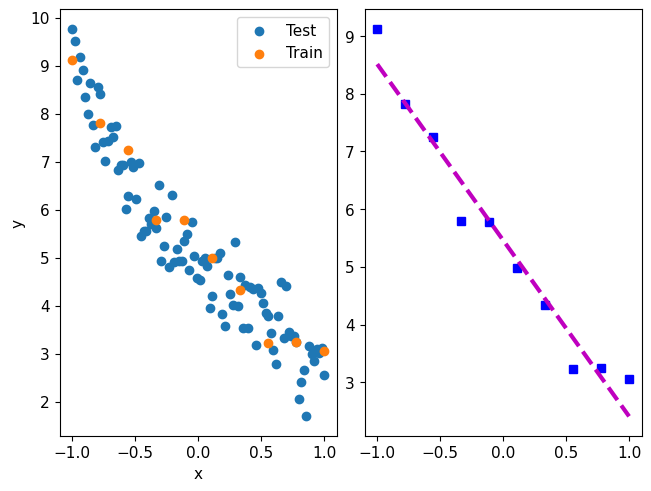

In [2]:
def NormalEq(X,y):
    return np.linalg.pinv(X).dot(y)

np.random.seed(100)
### Lets create training data
N = 10
X_tr = np.linspace(-1,1,N).reshape(-1,1)
y_tr = -5*np.sqrt(X_tr+1) + 10 + 0.5*np.random.randn(N).reshape(-1,1)
### Lets create test data
M = 100
X_ts = np.linspace(-1,1,M).reshape(-1,1)
y_ts = -5*np.sqrt(X_ts+1) + 10 + 0.5*np.random.randn(M).reshape(-1,1)

X_tr_biased = np.hstack((X_tr,np.ones((N,1))))
W_Normal = NormalEq(X_tr_biased,y_tr)
fig,ax = plt.subplots(nrows=1,ncols=2,layout="constrained")
ax[0].scatter(X_ts,y_ts,label="Test")
ax[0].scatter(X_tr,y_tr,label="Train")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(X_tr,y_tr,"bs")
ax[1].plot(X_tr,X_tr_biased.dot(W_Normal),"m--",lw=3.0)
ax[0].legend()
plt.show()

Using as error function the sum of squared errors (SSE),

$$E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}) = \frac{1}{2}\left\|\boldsymbol{X} \cdot \boldsymbol{w} - \boldsymbol{y}\right\|^2_2\,.$$

The gradient becomes

$$\nabla \boldsymbol{w} = \nabla_{\boldsymbol{w}} E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}) = \boldsymbol{X}^T \cdot (\boldsymbol{X} \cdot \boldsymbol{w} - \boldsymbol{y})\,.$$

In [3]:
def SSE(X,y,w):
    return 0.5*np.linalg.norm(X.dot(w)-y)**2

def GradSSE(X,y,w):
    return X.T.dot(X.dot(w)-y)



def plot_contour(X_bias, y, bounds, resolution=50, cmap="viridis", 
                 lr=0.3, linewidth=5, rstride=1, cstride=5, ax=None):
    (minx,miny),(maxx,maxy) = bounds
    
    x_range = np.linspace(minx, maxx, num=resolution)
    y_range = np.linspace(miny, maxy, num=resolution)
    X, Y = np.meshgrid(x_range, y_range)
    
    Z = np.zeros((len(x_range), len(y_range)))
    
    for i, w_i in enumerate(x_range):
        for j, w_j in enumerate(y_range):
            Z[j,i] = SSE(X_bias, y, [w_i, w_j])
    
    if not ax:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        ax.set_aspect('equal')
        ax.autoscale(tight=True)
    cset = ax.contourf(X, Y, Z, 30, cmap=cmap, rstride=rstride, 
                       cstride=cstride, linewidth=linewidth, lr=lr)
    cset = ax.contour(X, Y, Z, 10, cmap=cmap, rstride=rstride, 
                       cstride=cstride, linewidth=linewidth)
    plt.clabel(cset, inline=1, fontsize=7)
    return Z



def GD(X,y,w,lr,iters):
    w = np.array(w, dtype=np.float64)
    w_hist = np.zeros(shape=(iters+1, w.shape[0]))
    w_hist[0] = w
    for i in range(0,iters):
        delta_weights = -lr*GradSSE(X, y, w)
        w += delta_weights
        w_hist[i+1] = w
    return w_hist

In [4]:

def History(X, y, W_history, W_Normal, ax=None, title=None, show_legend=False):
    if not ax:
        fig = plt.figure(figsize=(5,5))
        ax = fig.gca()
    combi=np.hstack((W_Normal.reshape(2,1), W_history.T))
    bounds = (np.min(combi, axis=1)-2, np.max(combi, axis=1)+2)
    plot_contour(X, y, bounds, ax=ax)
    ax.scatter(W_Normal[0], W_Normal[1], c='m', marker='D', s=50, label='$w_{norm}$')
    ax.plot(W_history[:,0], W_history[:,1], '.:', c='b')
    ax.scatter(W_history[0,0], W_history[0,1], c='navy', marker='o', s=65, label='start')
    ax.scatter(W_history[-1,0], W_history[-1,1], c='navy', marker='s', s=50, label='end')
    plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); 
    if title:
        plt.title(title)
    if show_legend:
        plt.legend(scatterpoints=1, bbox_to_anchor=(1.37,1), frameon=True);

/tmp/ipykernel_121445/385322604.py:28: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth', 'lr'
  cset = ax.contourf(X, Y, Z, 30, cmap=cmap, rstride=rstride,
/tmp/ipykernel_121445/385322604.py:30: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  cset = ax.contour(X, Y, Z, 10, cmap=cmap, rstride=rstride,


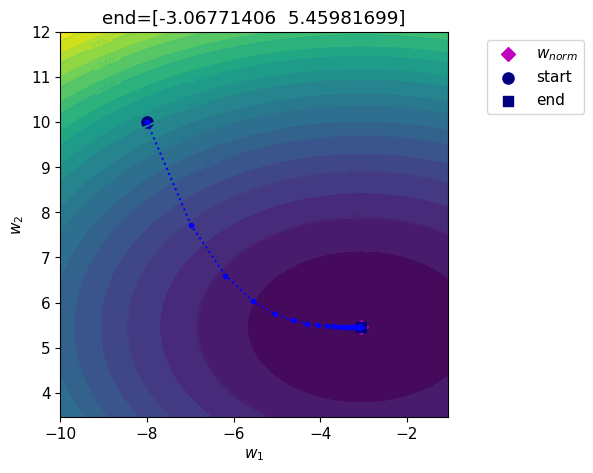

In [5]:
w_init = [-8,10] # we fix the initial weights to make it more illustrative
lr = 0.05
max_iters = 25

W_history = GD(X_tr_biased,y_tr.ravel(),w_init,lr,max_iters)
History(X_tr_biased, y_tr.ravel(), W_history, W_Normal, title='end='+str(W_history[-1]), show_legend=True)

/tmp/ipykernel_121445/385322604.py:28: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth', 'lr'
  cset = ax.contourf(X, Y, Z, 30, cmap=cmap, rstride=rstride,
/tmp/ipykernel_121445/385322604.py:30: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  cset = ax.contour(X, Y, Z, 10, cmap=cmap, rstride=rstride,


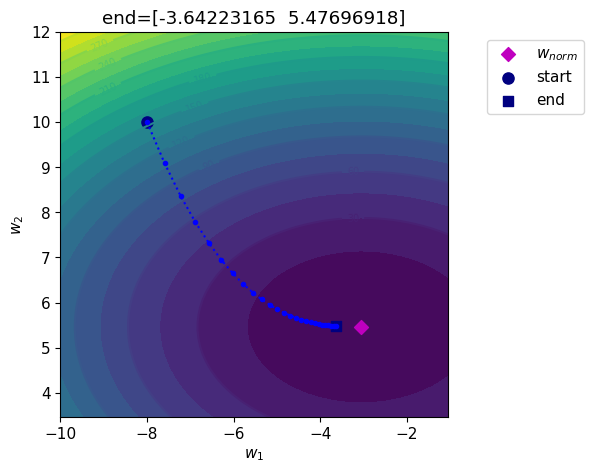

In [6]:
W_history = GD(X_tr_biased,y_tr.ravel(),w_init,0.02,max_iters)
History(X_tr_biased, y_tr.ravel(), W_history, W_Normal, title='end='+str(W_history[-1]), show_legend=True)

/tmp/ipykernel_121445/385322604.py:28: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth', 'lr'
  cset = ax.contourf(X, Y, Z, 30, cmap=cmap, rstride=rstride,
/tmp/ipykernel_121445/385322604.py:30: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  cset = ax.contour(X, Y, Z, 10, cmap=cmap, rstride=rstride,


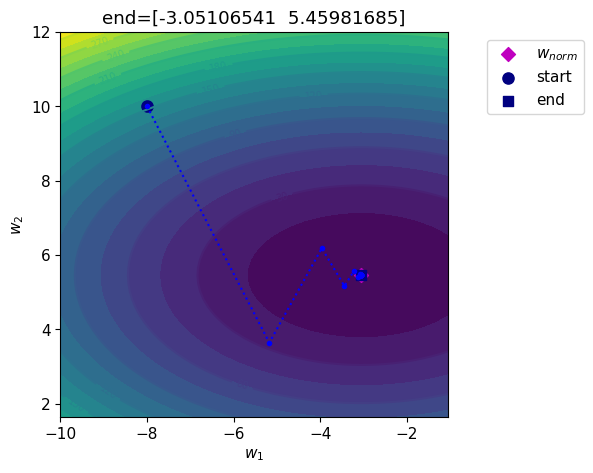

In [7]:
W_history = GD(X_tr_biased,y_tr.ravel(),w_init,0.14,max_iters)
History(X_tr_biased, y_tr.ravel(), W_history, W_Normal, title='end='+str(W_history[-1]), show_legend=True)